**Note**: This notebook is derived from Chapter 5: Model Evaluation and Improvement by Müller, Andreas C.; Guido, Sarah. _Introduction to Machine Learning with Python: A Guide for Data Scientists_ (p. 253). O'Reilly Media. Kindle Edition. 

Grid Search allows us to try different combinations of various hyperparameters. If we had a decision tree classifier and wanted to try out various hyperparameters, we would have to iterate the model over each one. If we had more than one combination, then it would be an M x N permutation. This could take a really long time! Let's look at the naive approach below:

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load iris dataset
iris = load_iris()

X = iris.data
y = iris.target

# GridSearch by hand

In [3]:
# naive grid search implementation
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

best_score = 0

for max_depth in [2, 4, 6, 8, 10]:
    for min_samples_split in [2, 4, 6, 8, 10]:
        
        # for each combination of parameters, train a DT
        DT = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        DT.fit(X_train, y_train)
        
        # evaluate the DT on the test set
        score = DT.score(X_test, y_test)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.97
Best parameters: {'max_depth': 4, 'min_samples_split': 2}


Now we have a big issue. We used the training set to adjust the parameters, we can no longer use it to assess how well the model fits the out of sample data. We need another out of sample dataset to help us determine how good our model is. We can split the data again, but this time we will be splitting it into three sets (train, test, validation). 

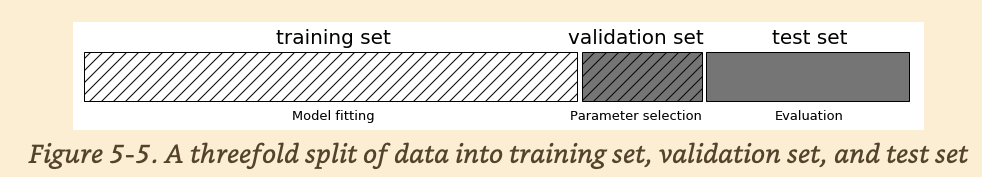

In [4]:
Image("../../assets/images/train_test_val.png")

We can use the training and validation sets to tune the hypterparameters and then use the test set for model evaluation. 

In [5]:
# split data into trian + validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=0)

# split train + validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Size of trianing set: {}  size of validation set: {}  size of test set:"
     " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

Size of trianing set: 84  size of validation set: 28  size of test set: 38



In [6]:
best_score = 0

for max_depth in [2, 4, 6, 8, 10]:
    for min_samples_split in [2, 4, 6, 8, 10]:
        
        # for each combination of parameters, train a DT
        DT = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split)
        DT.fit(X_train, y_train)
        
        # evaluate the DT on the validation set
        score = DT.score(X_valid, y_valid)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'max_depth' : max_depth, 'min_samples_split' : min_samples_split}
            
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.93
Best parameters: {'max_depth': 4, 'min_samples_split': 2}


Beforehand we got an accuracy score of 97%, but this time we got a score of 93%. According to the autheros fo _Introduction to ML in Python_, "Any choices made based on the test set accuracy 'leak' information from teh test set into the model. Therefore, it is important to keep a seperate test set, which is only used for the final evaluation."

## GridSearch with Cross Validation (GridSearchCV in sklearn)

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# Instantiate classifier
DT = DecisionTreeClassifier()

In [10]:
# Create parameter grid to pass into grid_search
param_grid = {'max_depth' : [2, 4, 6, 8, 10],
              'min_samples_split' : [2, 4, 6, 8, 10]}

In [11]:
# grid_search behaves just like a classifier (fit, predict, score)
grid_search = GridSearchCV(DT, param_grid, cv=5)

# Be sure to check out the parameters for cv for various types of cross-validation strategies

In [12]:
# Fit the model
grid_search.fit(X_train, y_train)

/Users/nicholasbeaudoin/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [13]:
# Score the algorithm with the best parameters
grid_search.score(X_test, y_test)

0.9736842105263158

In [14]:
# What were the best parameters?
grid_search.best_params_

{'max_depth': 4, 'min_samples_split': 4}

In [15]:
# What was the best cross validation score?
grid_search.best_score_

0.9553571428571429

In [16]:
# Convert results of CV and grid search to a pandas DF
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002668,0.002529,0.000713,0.000291,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.875,0.913043,1.0,...,0.928571,0.042983,21,0.965909,0.966292,0.955556,0.977778,0.956044,0.964316,0.008159
1,0.001365,0.000685,0.001487,0.001418,2,4,"{'max_depth': 2, 'min_samples_split': 4}",0.875,0.913043,1.0,...,0.928571,0.042983,21,0.965909,0.966292,0.955556,0.977778,0.956044,0.964316,0.008159
2,0.001260,0.000926,0.000629,0.000229,2,6,"{'max_depth': 2, 'min_samples_split': 6}",0.875,0.913043,1.0,...,0.928571,0.042983,21,0.965909,0.966292,0.955556,0.977778,0.956044,0.964316,0.008159
3,0.000758,0.000247,0.001004,0.000864,2,8,"{'max_depth': 2, 'min_samples_split': 8}",0.875,0.913043,1.0,...,0.928571,0.042983,21,0.965909,0.966292,0.955556,0.977778,0.956044,0.964316,0.008159
4,0.001388,0.000868,0.000591,0.000225,2,10,"{'max_depth': 2, 'min_samples_split': 10}",0.875,0.913043,1.0,...,0.928571,0.042983,21,0.965909,0.966292,0.955556,0.977778,0.956044,0.964316,0.008159


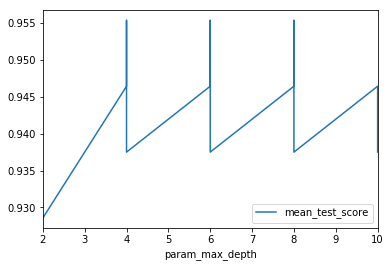

In [36]:
# Plot the results of one of the columns by mean_test_score
results.plot(x='param_max_depth', y='mean_test_score');

# Bonus

Fit a KNN model to the same data using Grid Search. Print out the pandas DF to see the differences in parameters. What is the best model parameters?